In [1]:
using JLD, PyPlot

In [42]:
archivo="control1/LFP_Promedio_est_con5.jld"

"control1/LFP_Promedio_est_con5.jld"

In [51]:
LFP=load(archivo)["LFPSaturados"]
saturados=load(archivo)["CanalesSaturados"]
respuestas=load(archivo)["Canalesrespuesta"];
retrazo=load(archivo)["retrazo"]
frecuencia=load(archivo)["freq"]

17.85550205219098

In [53]:
tantossaturados=length(saturados)
tantosrespuesta=length(respuestas);

In [48]:
texg=1136
latencia=round(Int, ceil(1.5*frecuencia))
retrazo

90

In [49]:
iniciobusqueda=retrazo
finbusqueda=retrazo+10*latencia

360

In [54]:
xxsresp=zeros(tantosrespuesta)
yysresp=zeros(tantosrespuesta)
j=1
for q in respuestas
    xxsresp[j]=q[2]
    yysresp[j]=q[1]
    j+=1
end
xxssatu=zeros(tantossaturados)
yyssatu=zeros(tantossaturados)
j=1
for q in saturados
    xxssatu[j]=q[2]
    yyssatu[j]=q[1]
    j+=1
end

In [55]:
ejemplo=LFP[:,:,texg];

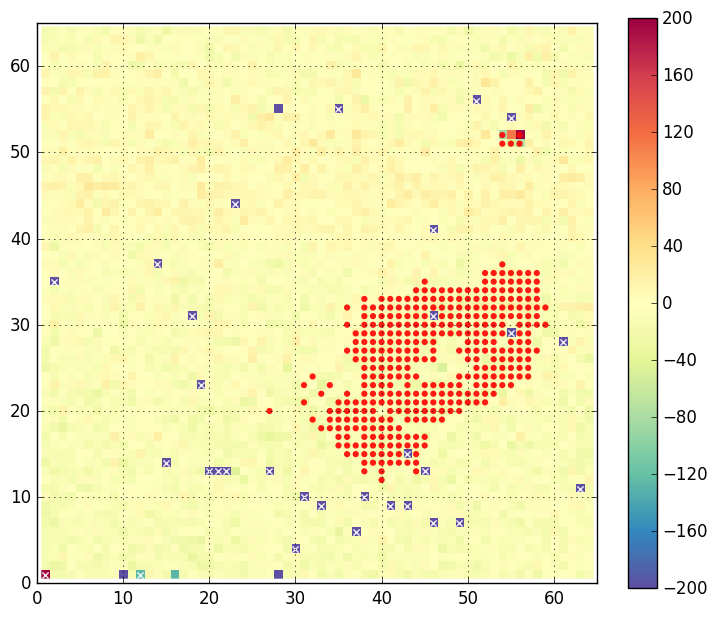

PyObject <matplotlib.collections.PathCollection object at 0x7fde61b2cd68>

In [56]:
figure(figsize=(8,8))
xlim(0,65)
ylim(0,65)
grid()
limites=200
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="Spectral_r", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
cb=colorbar(imagen, fraction=0.046)
scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none")   
scatter(xxssatu,yyssatu, alpha=0.9, c="white", edgecolor="none", marker="x") 
#scatter(46,31)

In [19]:
tmax=size(LFP,3)

1163

In [50]:
mean(LFP[31,46,iniciobusqueda:finbusqueda])

-1282.3040388607012

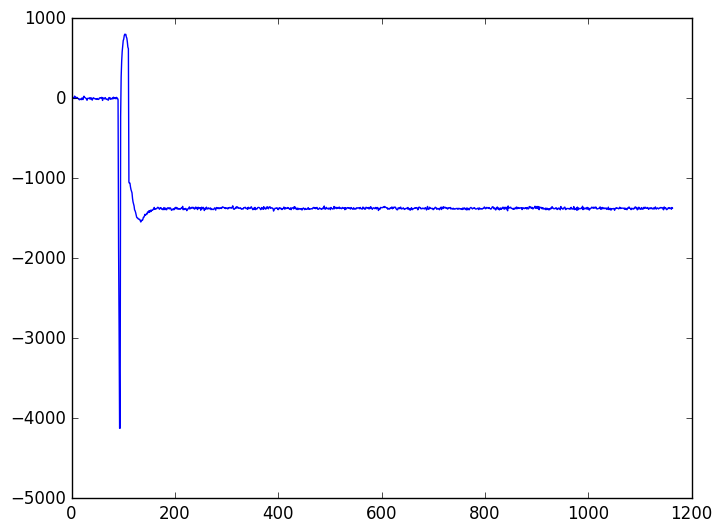

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde5e973940>

In [38]:
plot(1:tmax, vec(LFP[31,46,1:tmax]))

In [39]:
mean(ejemplo)

-20.38419246673584

In [ ]:

tmax=size(LFP,3)
for t=1:2
    ioff()
    PyPlot.ioff()
figure(figsize=(6,6))
xlim(0,65)
ylim(0,65)
    ejemplo=LFP[:,:,t]
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="winter", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
cb=colorbar(imagen, fraction=0.046)
    if t>(tmax-140)

        scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none")
        scatter(xxssatu,yyssatu, alpha=0.9, c="white", edgecolor="none", marker="s") 
    end
    savefig("LFP_Try_$t.png",dpi=90)
    close()
    PyPlot.close_figs()
end